In [4]:
# import yfinance as yf
ticker = 'MSFT'
df_ticker = yf.download(ticker)
df_ticker.to_excel(f'data/{ticker}.xlsx')

[*********************100%***********************]  1 of 1 completed


In [7]:
# import pandas as pd

df_microsoft = pd.read_excel('data/MSFT.xlsx', parse_dates=['Date'], index_col=0)
df_microsoft_linkedin = df_microsoft.loc['2016-12-08':,:].copy()

df_microsoft_linkedin['change_tomorrow'] = df_microsoft_linkedin.Close.pct_change(-1) * 100 * -1
df_microsoft_linkedin = df_microsoft_linkedin.dropna().copy()
df_microsoft_linkedin

,Open,High,Low,Close,Adj Close,Volume,change_tomorrow
Date,,,,,,,
2016-12-08,61.299999,61.580002,60.840000,61.009998,55.402447,21220800,1.549141
2016-12-09,61.180000,61.990002,61.130001,61.970001,56.274204,27349400,0.321694
2016-12-12,61.820000,62.299999,61.720001,62.169998,56.455830,20198100,1.286125
2016-12-13,62.500000,63.419998,62.240002,62.980000,57.191383,35718900,-0.478620
2016-12-14,63.000000,63.450001,62.529999,62.680000,56.918945,30352700,-0.159793
...,...,...,...,...,...,...,...
2024-08-29,414.940002,422.049988,410.600006,413.119995,413.119995,17045200,0.963710
2024-08-30,415.600006,417.489990,412.130005,417.140015,417.140015,24308300,-1.880620
2024-09-03,417.910004,419.880005,407.029999,409.440002,409.440002,20285900,-0.132064


In [12]:
import numpy as np
df_microsoft_linkedin['change_tomorrow_direction'] = np.where(
    df_microsoft_linkedin.change_tomorrow > 0, 'UP', 'DOWN')
df_microsoft_linkedin.change_tomorrow_direction.value_counts()

change_tomorrow_direction
UP      1044
DOWN     903
Name: count, dtype: int64

<Axes: xlabel='Date'>

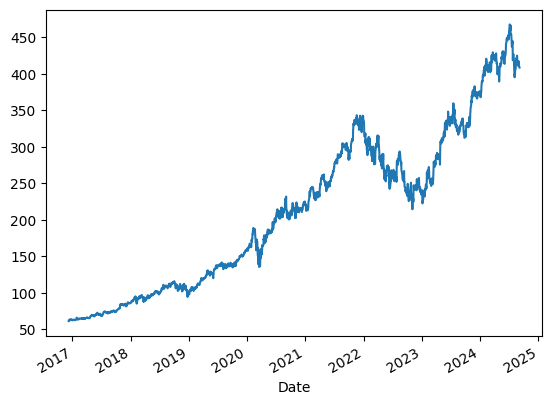

In [13]:
df_microsoft_linkedin.Close.plot()

In [ ]:
df_microsoft_linkedin.to_excel('data/Microsoft_LinkedIn_Processed.xlsx')